### Dependencies and Setup

In [18]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import requests

import time

from pprint import pprint

import openweathermapy.core as owm

from api_keys import api_key

from citipy import citipy

from datetime import datetime

### Set Range of latitudes and longitudes

In [2]:
lat_range = (-90, 90)

lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []

cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:

    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

631

### Create an empty dataframe with cities column to store weather variables

In [4]:
cities_data = pd.DataFrame(cities)

cities_data = cities_data.rename(columns={0: "City"})

cities_data["Temperature"] = ""

cities_data["Lat"] = ""

cities_data["Lon"] = ""

cities_data["Humidity"] = ""

cities_data["Cloudiness"] = ""

cities_data["Wind Speed"] = ""


cities_data.head()

,City,Temperature,Lat,Lon,Humidity,Cloudiness,Wind Speed
0,odweyne,,,,,,
1,albany,,,,,,
2,bethel,,,,,,
3,ponta do sol,,,,,,
4,attawapiskat,,,,,,


### Build URL inputs for API Calls

In [5]:
units = "imperial"

base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{base_url}appid={api_key}&units={units}&q="

### Create empty list for each weather variable 

In [6]:
lat = []

lon = []

temp_max = []

humidity = []

clouds = []

wind_speed = []

cities = []

dates = []

countries = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
record_count = 1

set_count = 1

for index, row in cities_data.iterrows():

    if (index % 50 == 0 and index >= 50):

        set_count += 1

        record_count = 0

    city = row["City"]

    final_query_url = query_url+city

    print("Processing Record %s of Set %s | %s" %
          (record_count, set_count, city))

    record_count += 1

    response = requests.get(final_query_url).json()

    try:

        cities.append(response['name'])

        dates.append(response['dt'])

        countries.append(response['sys']['country'])

        lon.append(response['coord']['lon'])

        lat.append(response['coord']['lat'])

        temp_max.append(response['main']['temp_max'])

        humidity.append(response['main']['humidity'])

        clouds.append(response['clouds']['all'])

        wind_speed.append(response['wind']['speed'])

    except (KeyError, IndexError):

        print("Data unavilable...skipping.")

Processing Record 1 of Set 1 | odweyne
Data unavilable...skipping.
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | attawapiskat
Data unavilable...skipping.
Processing Record 6 of Set 1 | beringovskiy
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | kudahuvadhoo
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | reforma
Processing Record 14 of Set 1 | urengoy
Processing Record 15 of Set 1 | thunder bay
Processing Record 16 of Set 1 | camana
Data unavilable...skipping.
Processing Record 17 of Set 1 | uk
Data unavilable...skipping.
Processing Record 18 of Set 1 | taolanaro
Data unavilable...skipping.
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | butajira
Processing Record 21 of Set 1 | nizhneyansk
Data

Processing Record 36 of Set 4 | nelson bay
Processing Record 37 of Set 4 | denpasar
Processing Record 38 of Set 4 | port-cartier
Processing Record 39 of Set 4 | sao joao do piaui
Processing Record 40 of Set 4 | lundazi
Processing Record 41 of Set 4 | karratha
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | houston
Processing Record 44 of Set 4 | praia da vitoria
Processing Record 45 of Set 4 | solnechnyy
Processing Record 46 of Set 4 | batagay-alyta
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | potoru
Processing Record 49 of Set 4 | yerbogachen
Processing Record 0 of Set 5 | lumeje
Processing Record 1 of Set 5 | wenceslau braz
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | half moon bay
Processing Record 4 of Set 5 | hearst
Processing Record 5 of Set 5 | waddan
Processing Record 6 of Set 5 | gemena
Processing Record 7 of Set 5 | san lorenzo
Processing Record 8 of Set 5 | iqaluit
Processing Record 9 of S

Processing Record 22 of Set 8 | lasa
Processing Record 23 of Set 8 | tsihombe
Data unavilable...skipping.
Processing Record 24 of Set 8 | phan thiet
Processing Record 25 of Set 8 | sabzevar
Processing Record 26 of Set 8 | araouane
Processing Record 27 of Set 8 | bonoua
Processing Record 28 of Set 8 | kajaani
Processing Record 29 of Set 8 | nguiu
Data unavilable...skipping.
Processing Record 30 of Set 8 | college
Processing Record 31 of Set 8 | laguna
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | belmonte
Processing Record 34 of Set 8 | san lawrenz
Processing Record 35 of Set 8 | poum
Processing Record 36 of Set 8 | mikhaylovka
Processing Record 37 of Set 8 | mlonggo
Processing Record 38 of Set 8 | lata
Processing Record 39 of Set 8 | nouadhibou
Processing Record 40 of Set 8 | mount isa
Processing Record 41 of Set 8 | chapleau
Processing Record 42 of Set 8 | nueva guinea
Processing Record 43 of Set 8 | mildura
Processing Record 44 of Set 8 | saskylakh
Processin

Processing Record 10 of Set 12 | itarema
Processing Record 11 of Set 12 | kailua
Processing Record 12 of Set 12 | katherine
Processing Record 13 of Set 12 | porbandar
Processing Record 14 of Set 12 | geraldton
Processing Record 15 of Set 12 | pendleton
Processing Record 16 of Set 12 | bac lieu
Data unavilable...skipping.
Processing Record 17 of Set 12 | limbang
Processing Record 18 of Set 12 | dakar
Processing Record 19 of Set 12 | parnamirim
Processing Record 20 of Set 12 | makokou
Processing Record 21 of Set 12 | senador jose porfirio
Processing Record 22 of Set 12 | ho chi minh city
Processing Record 23 of Set 12 | lusambo
Processing Record 24 of Set 12 | zaysan
Processing Record 25 of Set 12 | temaraia
Data unavilable...skipping.
Processing Record 26 of Set 12 | kununurra
Processing Record 27 of Set 12 | panguna
Processing Record 28 of Set 12 | lujan
Processing Record 29 of Set 12 | formoso do araguaia
Data unavilable...skipping.
Processing Record 30 of Set 12 | sandwick
Processing

### Create a dictonary with variables above

In [9]:
weather_dict = {

    "City": cities,

    "Country": countries,

    "Date": dates,

    "Lat": lat,

    "Lon": lon,

    "Max Temp": temp_max,

    "Humidity": humidity,

    "Cloudiness": clouds,

    "Wind Speed": wind_speed
}

### Create new dataframe using weather dictonary created above

In [10]:
weather_data = pd.DataFrame(weather_dict)

### Verify count of each variable is consistent for dataset and reaches 500 city minimum

In [11]:
weather_data.count()

City          567
Country       567
Date          567
Lat           567
Lon           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
dtype: int64

### Output File (CSV)

In [12]:
output_data_file = "../Resources/citiesWeather.csv"

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
* Convert Date to m/d/y

In [24]:
weather_data.to_csv(output_data_file, encoding="utf-8",
                    index=True, sep=",", header=True, na_rep="NaN")

timestamp = datetime.fromtimestamp(dates[0])

actual_date = timestamp.strftime("%m/%d/%y")

weather_data.head()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,1540669860,42.65,-73.75,42.80,81,90,11.41
1,Bethel,US,1540666380,60.79,-161.76,28.40,86,1,17.22
2,Ponta do Sol,BR,1540670658,-20.63,-46.00,72.91,81,56,12.77
3,Beringovskiy,RU,1540670658,63.05,179.32,28.13,100,80,6.62
4,Kapaa,US,1540666560,22.08,-159.32,82.40,74,75,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

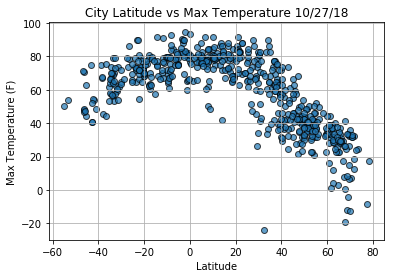

In [25]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Lat"], weather_data["Max Temp"],
            marker="o", alpha=.7, edgecolors='black')

# Incorporate the other graph properties

plt.title(f"City Latitude vs Max Temperature {actual_date}")

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("../Images/LatitudeVsTemp.png")

# Show plot

plt.show()

#### Latitude vs. Humidity Plot

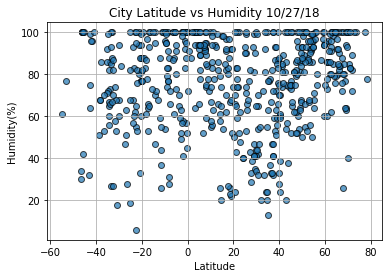

In [26]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Lat"], weather_data["Humidity"],
            marker="o", alpha=.7, edgecolors='black')

# Incorporate the other graph properties

plt.title(f"City Latitude vs Humidity {actual_date}")

plt.ylabel("Humidity(%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("../Images/LatitudeVsHumidity.png")

# Show plot

plt.show()

#### Latitude vs. Cloudiness Plot

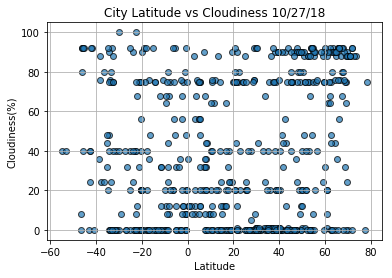

In [27]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"],
            marker="o", alpha=.7, edgecolors='black')

# Incorporate the other graph properties

plt.title(f"City Latitude vs Cloudiness {actual_date}")

plt.ylabel("Cloudiness(%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("../Images/LatitudeVsCloudiness.png")

# Show plot

plt.show()

#### Latitude vs. Wind Speed Plot

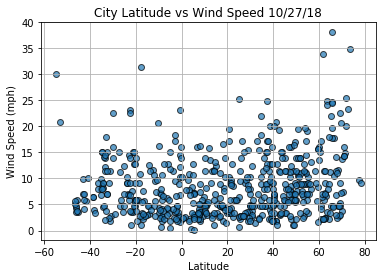

In [28]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Lat"], weather_data["Wind Speed"],
            marker="o", alpha=.7, edgecolors='black')

# Incorporate the other graph properties

plt.title(f"City Latitude vs Wind Speed {actual_date}")

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("../Images/LatitudeVsWindSpeed.png")

# Show plot

plt.show()

### Conclusion
* The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.